<a href="https://colab.research.google.com/github/liuxiu842/ML/blob/master/lx_L15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"liuxiu","key":"7448193576ac21df17fc7194c26816e8"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c avazu-ctr-prediction

!gunzip train.gz
!gunzip test.gz

 72% 24.0M/33.2M [00:00<00:00, 23.5MB/s]
100% 33.2M/33.2M [00:00<00:00, 75.0MB/s]
 89% 105M/118M [00:00<00:00, 82.5MB/s] 
100% 118M/118M [00:01<00:00, 116MB/s] 
 99% 1.03G/1.04G [00:07<00:00, 121MB/s]
100% 1.04G/1.04G [00:07<00:00, 156MB/s]


In [2]:
!pip install dummyPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from dummyPy import OneHotEncoder
import random
import pickle

file_path = '/content/'
fp_train = file_path + 'train'
fp_test = file_path + 'test'

fp_sub_train_f = file_path + 'sub_train_f.csv'
fp_col_counts = file_path + 'col_counts'

fp_train_f = file_path + 'train_f.csv'
fp_test_f = file_path + 'test_f.csv'

fp_lb_enc = file_path + 'lb_enc'
fp_oh_enc = file_path + 'oh_enc'


cols = ['C1',
        'banner_pos',
        'site_domain',
        'site_id',
        'site_category',
        'app_id',
        'app_category',
        'device_type',
        'device_conn_type',
        'C14',
        'C15',
        'C16']

cols_train = ['id', 'click']
cols_test = ['id']
cols_train.extend(cols)
cols_test.extend(cols)

#loading data
print('loading data...')
df_train_ini = pd.read_csv(fp_train, nrows = 10)
df_train_org = pd.read_csv(fp_train, chunksize = 10000000, iterator = True)
df_test_org = pd.read_csv(fp_test, chunksize = 10000000, iterator = True)


#init...
cols_counts = {}
for col in cols:# feature catergory count
    cols_counts[col] = df_train_ini[col].value_counts()

for chunk in df_train_org:
    for col in cols:
        cols_counts[col] = cols_counts[col].append(chunk[col].value_counts())

for chunk in df_test_org:
    for col in cols:
        cols_counts[col] = cols_counts[col].append(chunk[col].value_counts())

for col in cols:
    cols_counts[col] = cols_counts[col].groupby(cols_counts[col].index).sum()
    cols_counts[col] = cols_counts[col].sort_values(ascending=False)

pickle.dump(cols_counts, open(fp_col_counts,'wb'))

k=99
col_index = {}
for col in cols:
    col_index[col] = cols_counts[col][0:k].index

df_train_org = pd.read_csv(fp_train, dtype = {'id': str}, chunksize = 10000000, iterator = True)
df_test_org  = pd.read_csv(fp_test,  dtype = {'id': str}, chunksize = 10000000, iterator = True)

hd_flag = True
for chunk in df_train_org:
    df = chunk.copy()
    for col in cols:
        df[col] = df[col].astype('object')
        df.loc[~df[col].isin(col_index[col]), col] = 'other'
    with open(fp_train_f, 'a') as f:
        df.to_csv(f, columns = cols_train, header = hd_flag, index=False)
    hd_flag = False


hd_flag = True
for chunk in df_test_org:
    df = chunk.copy()
    for col in cols:
        df[col] = df[col].astype('object')
        df.loc[~df[col].isin(col_index[col]), col] = 'other'
    with open(fp_test_f, 'a') as f:
        df.to_csv(f, columns = cols_test, header = hd_flag, index=False)
    hd_flag = False

#label encoding for catergory feature
lb_enc = {}
for col in cols:
    col_index[col] = np.append(col_index[col], 'other')

for col in cols:
    lb_enc[col] = LabelEncoder()
    lb_enc[col].fit(col_index[col])

# save the labelencoding
pickle.dump(lb_enc, open(fp_lb_enc, 'wb'))


#one-hot enconding
oh_enc = OneHotEncoder(cols)

df_train_f = pd.read_csv(fp_train_f, index_col=None, chunksize =5000000, iterator=True)
df_test_f = pd.read_csv(fp_test_f, index_col=None, chunksize =5000000, iterator=True)

for chunk in df_train_f:
    oh_enc.fit(chunk)
for chunk in df_test_f:
    oh_enc.fit(chunk)

pickle.dump(oh_enc, open(fp_oh_enc, 'wb'))

n = sum(1 for line in open(fp_train_f)) - 1

s = 2000000

skip = sorted(random.sample(range(1, n+1), n-s))
df_train = pd.read_csv(fp_train_f, skiprows = skip)
df_train.columns = cols_train

df_train.to_csv(fp_sub_train_f, index=False)


#######################################

  Created wheel for dummyPy: filename=dummyPy-0.3-cp36-none-any.whl size=3581 sha256=be248d2a967428544f458b7090e239b351107f0663902e419d4c8ef05fa2a27b
  Stored in directory: /root/.cache/pip/wheels/a0/7f/e6/26c6a4532944c2dca7130ae56263adc0b002a5de9e9ae6fb4b
Successfully built dummyPy
loading data...


trainning....
score 0.37436727691017646
trainning....
score 0.44482750732116894
trainning....
score 0.49073856431235463
trainning....
score 0.5534525429684517
trainning....
score 0.4272069884763891
trainning....
score 0.37579522744014326
trainning....
score 0.39313453957263655
trainning....
score 0.45976424650924674
LR model saved
[0.37436727691017646, 0.44482750732116894, 0.49073856431235463, 0.5534525429684517, 0.4272069884763891, 0.37579522744014326, 0.39313453957263655, 0.45976424650924674]


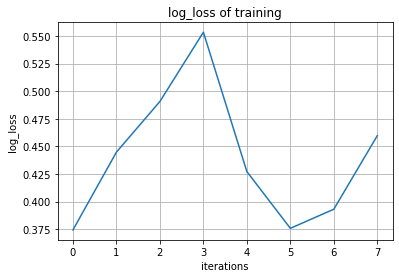

predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predic

In [3]:
# 使用LR模型对Avazu CTR进行预估
import pandas as pd
import numpy as np
from dummyPy import OneHotEncoder  # 超大规模数据one-hot编码
from sklearn.linear_model import SGDClassifier  # 梯度下降分类
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt 
import pickle

##==================== 设置文件路径File-Path (fp) ====================##
file_path = '/content/' #需要改成你的文件路径
fp_train_f = file_path + "train_f.csv"
fp_test_f  = file_path + "test_f.csv"

# one-hot编码保存
fp_oh_enc = file_path + "oh_enc"
# LR模型保存
fp_lr_model = file_path + "lr/lr_model"#need create a file lr/lr_model
# submission文件保存
fp_sub = file_path + "lr/LR_submission.csv"

#trainning LR
oh_enc = pickle.load(open(fp_oh_enc, 'rb'))

chuncksize = 50000
df_train_f = pd.read_csv(fp_train_f, dtype ={'id':str}, index_col=None, chunksize=chuncksize, iterator =True)

lr_model = SGDClassifier(loss ='log')
scores = []

k=100
i=1
for chunk in df_train_f:
    #drop k sample
    if i < k:
        i+=1
        continue
    print('trainning....')
    i = 1
    df_train = oh_enc.transform(chunk)
    #LR traning
    feature_train = df_train.columns.drop(['id', 'click'])
    train_X = df_train[feature_train]
    train_y = df_train['click'].astype('int')
    lr_model.partial_fit(train_X, train_y, classes = [0,1])

    #logloss score
    y_pred = lr_model.predict_proba(train_X)[:, 1]
    score = log_loss(train_y, y_pred)
    print('score', score)
    scores.append(score)

#save model
pickle.dump(lr_model, open(fp_lr_model, 'wb'))
print('LR model saved')

print(scores)

#draw score curve line
plt.title("LR Training Curve") 
plt.plot(scores)
plt.xlabel('iterations')
plt.ylabel('log_loss')
plt.title('log_loss of training')
plt.grid()
plt.show()

import gc
del lr_model
del df_train_f
gc.collect()

###prediction
df_test_f = pd.read_csv(fp_test_f, dtype ={'id':str}, index_col =None, chunksize=chuncksize, iterator =True)
lr_model = pickle.load(open(fp_lr_model, 'rb'))

header = True
for chunk in df_test_f:
    print('predicting...')
    df_test = oh_enc.transform(chunk)

    feature_test = df_test.columns.drop(['id'])
    test_X = df_test[feature_test]

    y_pred = lr_model.predict_proba(test_X)[:, 1]

    chunk['click'] = y_pred
    with open(fp_sub, 'a') as f:
        chunk.to_csv(f, columns =['id', 'click'], header = header, index =False)
    header = False

print('submittion completed')

In [1]:
#!pip install deepctr
# 使用DeepFM模型对Avazu CTR进行预估
import pandas as pd
import numpy as np
from dummyPy import OneHotEncoder  # 超大规模数据one-hot编码
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from deepctr.models import DeepFM
from deepctr.inputs import SparseFeat,get_feature_names
import pickle


##==================== 设置文件路径File-Path (fp) ====================##
file_path = '/content/'
#fp_train_f = file_path + "sub_train_f.csv" #使用小样本进行训练
fp_train_f = file_path + "train_f.csv"
fp_test_f  = file_path + "test_f.csv"

##==================== DeepFM 训练 ====================##
data = pd.read_csv(fp_train_f, dtype={'id':str}, index_col=None)
test = pd.read_csv(fp_test_f, dtype={'id':str}, index_col=None)
print('data loaded')


# submission文件保存
fp_sub = file_path + "DCN/DCN_submission.csv"


#数据加载
sparse_features = ['C1', 'banner_pos', 'site_domain', 'site_id','site_category','app_id','app_category', 'device_type', 'device_conn_type','C14', 'C15','C16']
target = ['click']

# 对特征标签进行编码 train
for feature in sparse_features:
    lbe = LabelEncoder()
    data[feature] = lbe.fit_transform(data[feature])
# 计算每个特征中的 不同特征值的个数
fixlen_feature_columns = [SparseFeat(feature, data[feature].nunique()) for feature in sparse_features]
linear_feature_columns = fixlen_feature_columns
dnn_feature_columns = fixlen_feature_columns
feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)
print(fixlen_feature_columns)
print(feature_names)

# 对特征标签进行编码 test
for feature in sparse_features:
    lbe1 = LabelEncoder()
    test[feature] = lbe1.fit_transform(test[feature])



# 将数据集切分成训练集和测试集
#train, test = train_test_split(data, test_size=0.2)
train_model_input = {name:data[name].values for name in feature_names}
test_model_input = {name:test[name].values for name in feature_names}

# 使用DeepFM进行训练
model = DeepFM(linear_feature_columns, dnn_feature_columns, task='binary')
# binary_crossentropy就是logloss
model.compile("adam", "binary_crossentropy", metrics=['binary_crossentropy'], )
history = model.fit(train_model_input, data[target].values, batch_size=256, epochs=1, verbose=True, validation_split=0.2, )
# 使用DeepFM进行预测
pred_ans = model.predict(test_model_input, batch_size=256)



test['click'] = pred_ans
with open(fp_sub, 'a') as f:
    test.to_csv(f, columns =['id', 'click'], header = True, index =False)

# # 输出RMSE或MSE
# mse = round(mean_squared_error(test[target].values, pred_ans), 4)
# rmse = mse ** 0.5
# print("test RMSE", rmse)

#输出LogLoss
from sklearn.metrics import log_loss
pred_train = model.predict(train_model_input, batch_size=256)
score = log_loss(data[target].values, pred_train)
print("LogLoss", score)



data loaded
[SparseFeat(name='C1', vocabulary_size=7, embedding_dim=4, use_hash=False, dtype='int32', embedding_name='C1', group_name='default_group'), SparseFeat(name='banner_pos', vocabulary_size=7, embedding_dim=4, use_hash=False, dtype='int32', embedding_name='banner_pos', group_name='default_group'), SparseFeat(name='site_domain', vocabulary_size=100, embedding_dim=4, use_hash=False, dtype='int32', embedding_name='site_domain', group_name='default_group'), SparseFeat(name='site_id', vocabulary_size=99, embedding_dim=4, use_hash=False, dtype='int32', embedding_name='site_id', group_name='default_group'), SparseFeat(name='site_category', vocabulary_size=26, embedding_dim=4, use_hash=False, dtype='int32', embedding_name='site_category', group_name='default_group'), SparseFeat(name='app_id', vocabulary_size=100, embedding_dim=4, use_hash=False, dtype='int32', embedding_name='app_id', group_name='default_group'), SparseFeat(name='app_category', vocabulary_size=36, embedding_dim=4, use_

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


126341/126341 [==============================] - 613s 5ms/step - loss: 0.4090 - binary_crossentropy: 0.4085 - val_loss: 0.4023 - val_binary_crossentropy: 0.4017
LogLoss 0.4063795697668633
